# <center>Pokemon EDA</center>

### Modules

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

### Initializing the dataframe

In [53]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Cleaning the dataframe

In [54]:
df.drop(columns=['#'], inplace=True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Observing the Five Points Summary of the dataset

In [310]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,423.322237,68.669774,75.978695,71.744341,70.213049,70.109188,66.607190,3.380826
std,112.932936,25.946152,29.920554,29.629870,30.263860,27.401096,27.845601,1.671360
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,325.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,430.000000,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000,3.000000
75%,500.000000,80.000000,95.000000,90.000000,90.000000,85.000000,88.500000,5.000000
max,770.000000,255.000000,180.000000,230.000000,180.000000,230.000000,180.000000,6.000000


### Assigning a seperate column for 'Mega' Pokemons

In [55]:
mega_list = [pokemon for pokemon in df['Name'] if 'Mega' in pokemon]
mega_list

# creating a new column for mega pokemons
df['Mega Pokemon'] = pd.Series(mega_list)

# removing mega pokemons from Name columns
df = df[df['Name'].str.contains('Mega') == False]
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega Pokemon
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,VenusaurMega Venusaur
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,CharizardMega Charizard X
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,CharizardMega Charizard Y
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,BeedrillMega Beedrill
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,PidgeotMega Pidgeot


### Treating the null values

In [57]:
# df.isnull().sum()
df = df.fillna(0)
df.isnull().sum()

Name            0
Type 1          0
Type 2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Mega Pokemon    0
dtype: int64

### Visualizing the correlation between vairables

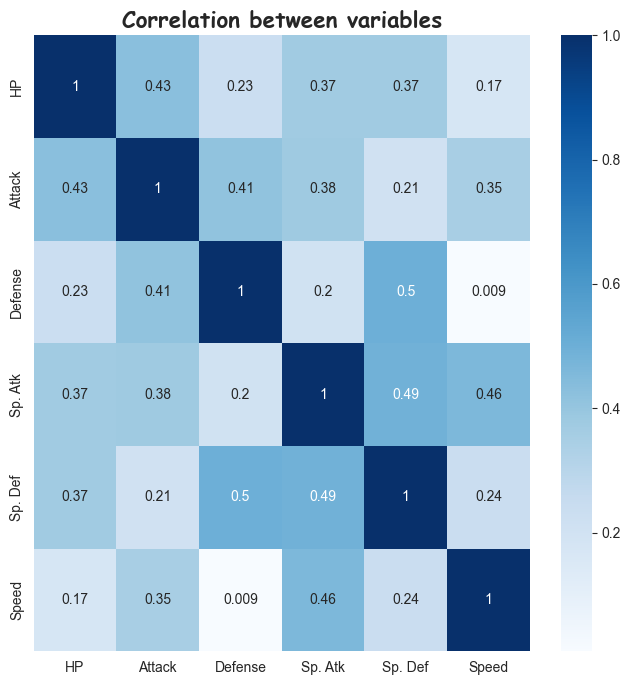

In [58]:
corr_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
corr_df.head()

plt.figure(figsize=(8, 8))
plt.title(label='Correlation between variables', fontdict={'family':'Comic Sans MS', 'size':16, 'weight':'bold'})
sns.heatmap(data=corr_df.corr(), annot=True, cmap='Blues')
plt.show()

- Special Attack & Special Defence are positively correlated with Special Defence.  
- And apparently, there are no negative correlations between any two variables.

### Total Stats for Type 1 Pokemon

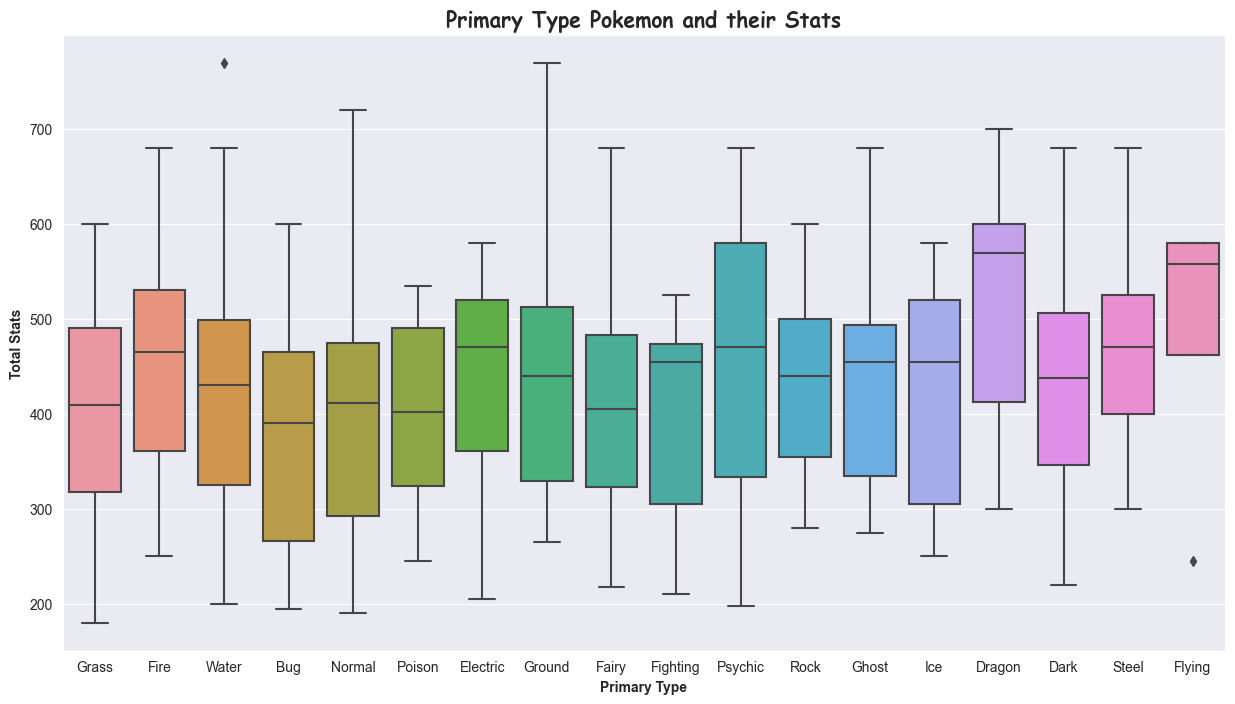

In [63]:
plt.figure(figsize=(15, 8))
plt.title(label='Primary Type Pokemon and their Stats', fontdict={'family':'Comic Sans MS', 'size':15, 'weight':'bold'})

sns.boxplot(data=df, x='Type 1', y='Total')

plt.ylabel(ylabel='Total Stats', fontdict={'weight':'bold'})
plt.xlabel(xlabel='Primary Type', fontdict={'weight':'bold'})
plt.show()

- Ground type Pokemon have the highest stats than rest of the primary type Pokemon.  
- And the Bug type Pokemon are the weakest.

### Number of Pokemon for each Generation

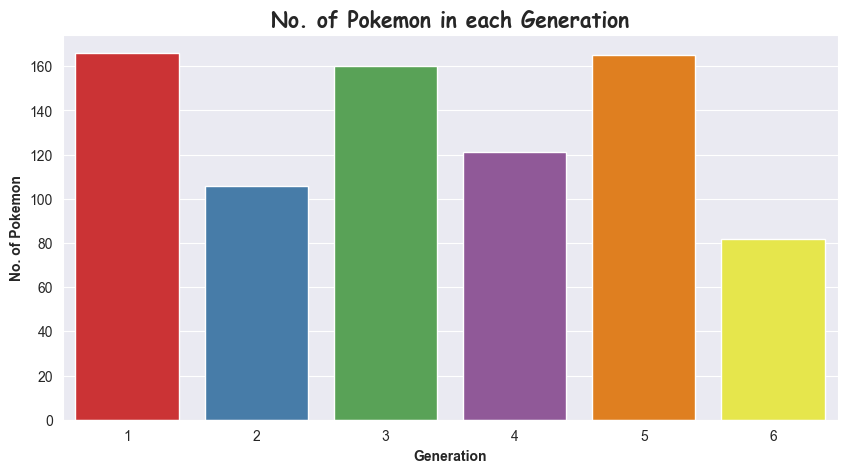

In [38]:
plt.figure(figsize=(10, 5))
plt.title(label='No. of Pokemon in each Generation', fontdict={'family':'Comic Sans MS', 'size':15, 'weight':'bold'})

sns.countplot(data=df, x='Generation', palette='Set1')

plt.xlabel(xlabel='Generation', fontdict={'weight':'bold'})
plt.ylabel(ylabel='No. of Pokemon', fontdict={'weight':'bold'})
plt.show()

- Generations 1, 3 and 5 have higher number of Pokemon. 
- Whereas Generation 6 has the lowest number of Pokemon.

### Number of Pokemon according to primary type

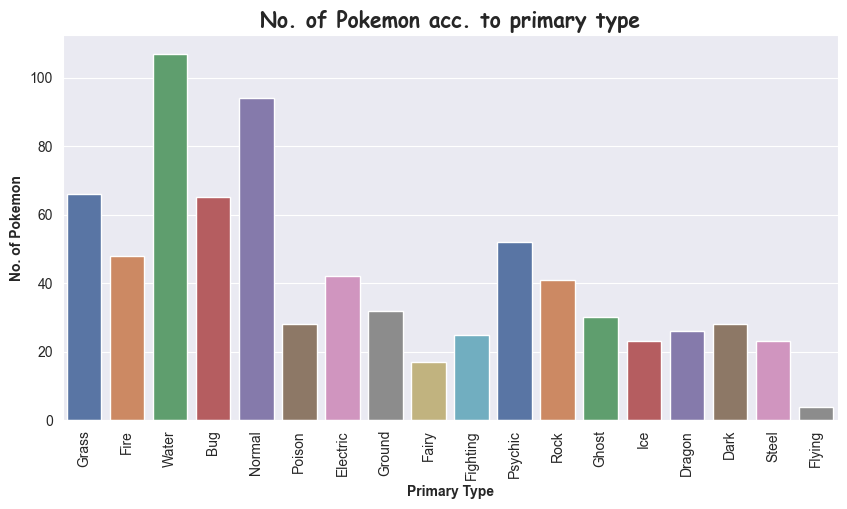

In [65]:
plt.figure(figsize=(10, 5))
plt.title(label='No. of Pokemon acc. to primary type', fontdict={'family':'Comic Sans MS', 'size':15, 'weight':'bold'})

sns.countplot(data=df, x='Type 1', palette='deep')

plt.xticks(rotation=90)
plt.xlabel(xlabel='Primary Type', fontdict={'weight':'bold'})
plt.ylabel(ylabel='No. of Pokemon', fontdict={'weight':'bold'})
plt.show()

- Most of the Pokemon have 'Water' as their primary type.
- Flying types are the least in number.

### Number of Pokemon according to secondary type

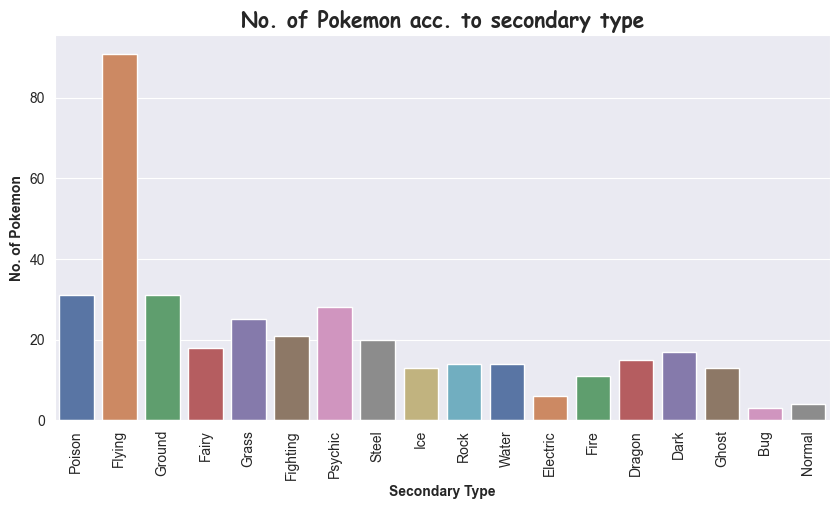

In [67]:
plt.figure(figsize=(10, 5))
plt.title(label='No. of Pokemon acc. to secondary type', fontdict={'family':'Comic Sans MS', 'size':15, 'weight':'bold'})

sns.countplot(data=df[df['Type 2'] != 0], x='Type 2', palette='deep')

plt.xticks(rotation=90)
plt.xlabel(xlabel='Secondary Type', fontdict={'weight':'bold'})
plt.ylabel(ylabel='No. of Pokemon', fontdict={'weight':'bold'})
plt.show()

- Apparently, Flying is the most significant secondary type for the Pokemon.
- From this information, we can deduce that most Pokemon may not have all the abilities of primary Flying type Pokemon, but most of them can fly.

### Number of Pokemon with both the Types 

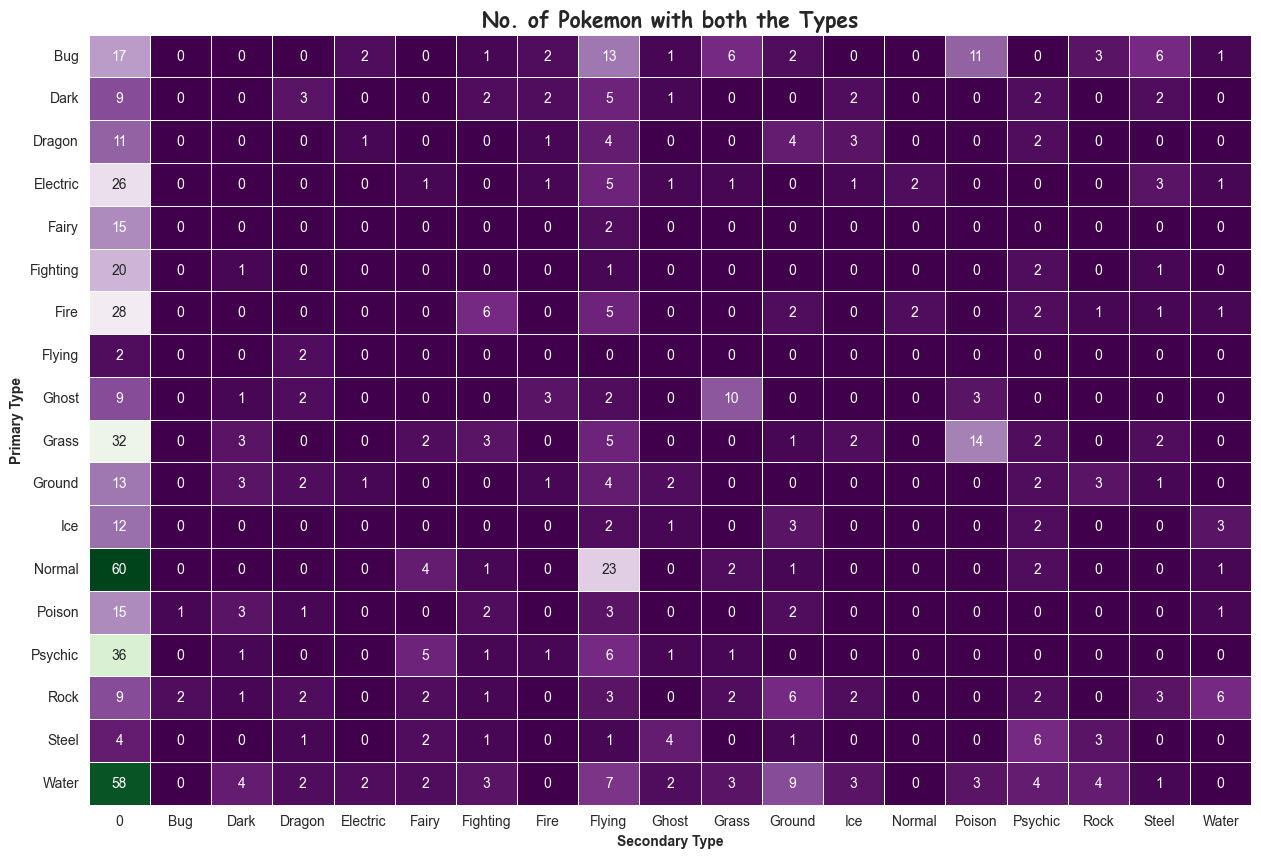

In [260]:
plt.figure(figsize=(15, 10))
plt.title(label='No. of Pokemon with both the Types', fontdict={'family':'Comic Sans MS', 'size':15, 'weight':'bold'})

data=pd.crosstab(df["Type 1"], df["Type 2"])
sns.heatmap(data=data, annot=True, cmap="PRGn", cbar=False, linewidths=0.5)


plt.xlabel(xlabel='Secondary Type', fontdict={'weight':'bold'})
plt.ylabel(ylabel='Primary Type', fontdict={'weight':'bold'})
plt.show()

- We can observe that, high number of Pokemon have only one type (i.e. Primary Type).
- 23 Pokemon have 'Normal' as their primary type and 'Flying' as their secondary Type.
- Apparently, Pokemon with 'Fairy' &  'Flying' as their primary type rarely have secondary type.

### Top 3 strongest Pokemon in each Generation

In [142]:
gen1 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 1) & (df['Legendary'] == False)].head(3)
gen2 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 2) & (df['Legendary'] == False)].head(3)
gen3 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 3) & (df['Legendary'] == False)].head(3)
gen4 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 4) & (df['Legendary'] == False)].head(3)
gen5 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 5) & (df['Legendary'] == False)].head(3)
gen6 = df.sort_values(by=['Total'], ascending=False)[(df['Generation'] == 6) & (df['Legendary'] == False)].head(3)


In [221]:
fig = make_subplots(
    rows=3,
    cols=2,
    specs=[[{"type": "polar"} for _ in range(2)] for _ in range(3)]
)

# Generation 1
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen1.iloc[i]['HP'], gen1.iloc[i]['Attack'], gen1.iloc[i]['Defense'], 
                                     gen1.iloc[i]['Sp. Atk'], gen1.iloc[i]['Sp. Def'], gen1.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself', 
                                  name=gen1.iloc[i]['Name']), row=1, col=1)

    
    
# Generation 2
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen2.iloc[i]['HP'], gen2.iloc[i]['Attack'], gen2.iloc[i]['Defense'], 
                                     gen2.iloc[i]['Sp. Atk'], gen2.iloc[i]['Sp. Def'], gen2.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself', 
                                  name=gen2.iloc[i]['Name']), row=1, col=2)
    
    

# Generation 3
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen3.iloc[i]['HP'], gen3.iloc[i]['Attack'], gen3.iloc[i]['Defense'], 
                                     gen3.iloc[i]['Sp. Atk'], gen3.iloc[i]['Sp. Def'], gen3.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself',
                                  name=gen3.iloc[i]['Name']), row=2, col=1)
    
    
    
    
    
# Generation 4
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen4.iloc[i]['HP'], gen4.iloc[i]['Attack'], gen4.iloc[i]['Defense'], 
                                     gen4.iloc[i]['Sp. Atk'], gen4.iloc[i]['Sp. Def'], gen4.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself',
                                  name=gen4.iloc[i]['Name']), row=2, col=2)
    

    
    
# Generation 5
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen5.iloc[i]['HP'], gen5.iloc[i]['Attack'], gen5.iloc[i]['Defense'], 
                                     gen5.iloc[i]['Sp. Atk'], gen5.iloc[i]['Sp. Def'], gen5.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself',
                                  name=gen5.iloc[i]['Name']), row=3, col=1)
    

    
    
# Generation 6
for i in range(3):
    fig.add_trace(go.Scatterpolar(r=[gen6.iloc[i]['HP'], gen6.iloc[i]['Attack'], gen6.iloc[i]['Defense'], 
                                     gen6.iloc[i]['Sp. Atk'], gen6.iloc[i]['Sp. Def'], gen6.iloc[i]['Speed']],
                                  theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                                  fill='toself',
                                  name=gen6.iloc[i]['Name']), row=3, col=2)
    
    
    

fig.update_layout(
    font_family="Comic Sans MS",
    title={'text' : 'Top 3 Pokemon in each Generation',
           'x':0.5,
            'xanchor': 'center'},
    width=1100, height=1500, showlegend=True)


fig.update_polars(dict(
    radialaxis=dict(
      visible=True, range=[50, 165])
))


fig.write_image('assets/Top 3 Pokemon in each Generation.png')
fig.show()

In [238]:
print('The greatest Pokemon in each generation are: \n')

print(f"Generation 1 - Pokemon: {gen1.iloc[0]['Name']} with Stats: {gen1.iloc[0]['Total']}")
print(f"Generation 2 - Pokemon: {gen2.iloc[0]['Name']} with Stats: {gen2.iloc[0]['Total']}")
print(f"Generation 3 - Pokemon: {gen3.iloc[0]['Name']} with Stats: {gen3.iloc[0]['Total']}")
print(f"Generation 4 - Pokemon: {gen4.iloc[2]['Name']} with Stats: {gen4.iloc[2]['Total']}")
print(f"Generation 5 - Pokemon: {gen5.iloc[0]['Name']} with Stats: {gen5.iloc[0]['Total']}")
print(f"Generation 6 - Pokemon: {gen6.iloc[0]['Name']} with Stats: {gen6.iloc[0]['Total']}")

# All top 3 pokemons in gen 4 have 600 stats but visually Manaphy seems to be well balanced.  
# Hence I chose 3rd pokemon (chronically) from gen 4.

The greatest Pokemon in each generation are: 

Generation 1 - Pokemon: Mew with Stats: 600
Generation 2 - Pokemon: Celebi with Stats: 600
Generation 3 - Pokemon: Slaking with Stats: 670
Generation 4 - Pokemon: Manaphy with Stats: 600
Generation 5 - Pokemon: MeloettaAria Forme with Stats: 600
Generation 6 - Pokemon: Goodra with Stats: 600


### No. of Legendary Pokemons per Generation

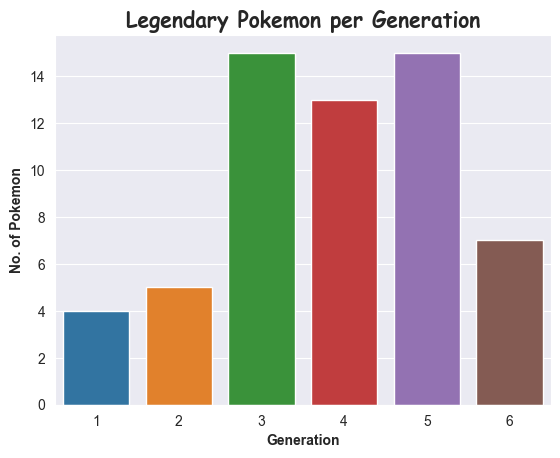

In [270]:
plt.title("Legendary Pokemon per Generation", fontweight='bold', fontfamily='Comic Sans MS', fontsize=15)

sns.countplot(data=df[df['Legendary'] == True], x='Generation')

plt.xlabel(xlabel='Generation', fontweight='bold')
plt.ylabel(ylabel='No. of Pokemon', fontweight='bold')
plt.show()

- Generation 3 & 4 have most number of Legendary Pokemon.

### Stats of Legendary and Non-Legendary Pokemon in each Generation

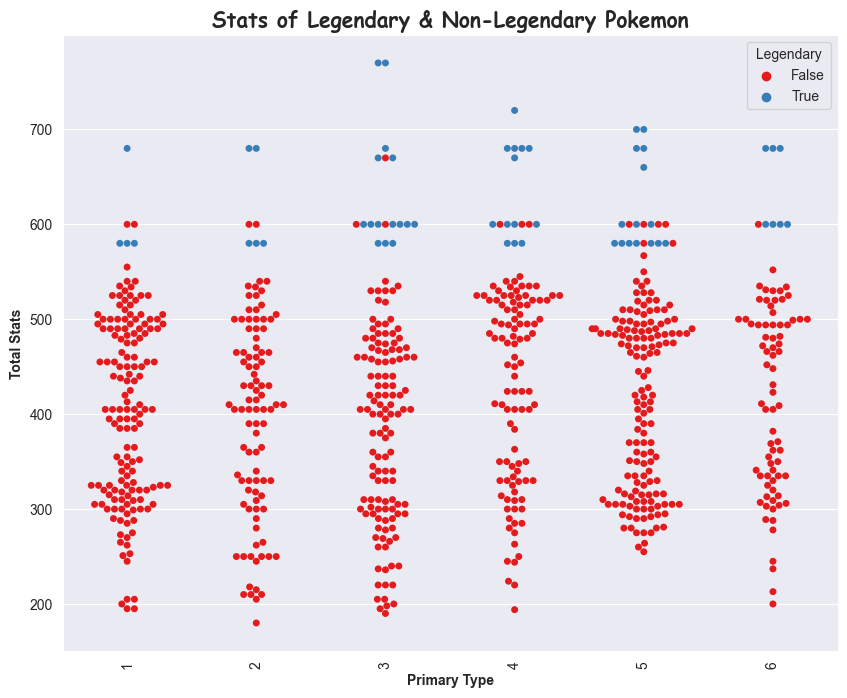

In [268]:
plt.figure(figsize=(10, 8))
plt.title("Stats of Legendary & Non-Legendary Pokemon", fontweight='bold', fontfamily='Comic Sans MS', fontsize=15)

sns.swarmplot(data=df, x='Generation', y='Total', hue='Legendary', palette='Set1')

plt.xticks(rotation=90)
plt.xlabel(xlabel='Primary Type', fontweight='bold')
plt.ylabel(ylabel='Total Stats', fontweight='bold')
plt.show()

Clearly, Legendary Pokemon have better stats as compared to Non-Legendary Pokemon

### Visualize the Types of Legendary Pokemon

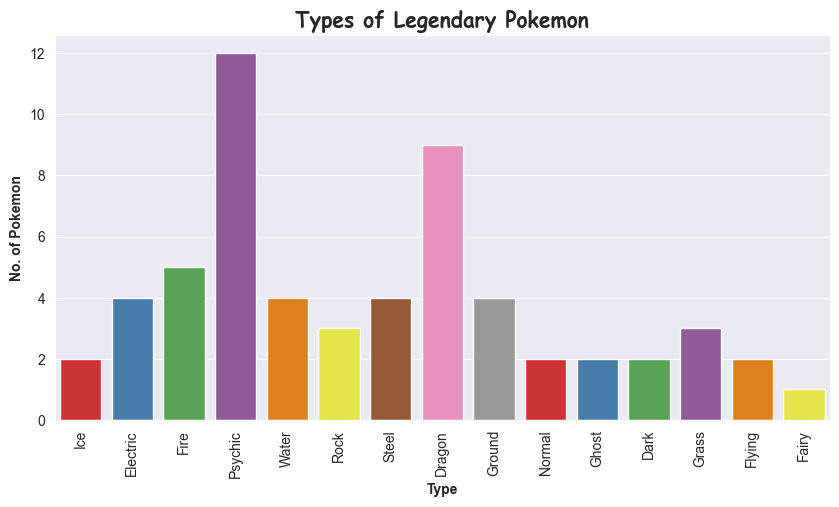

In [309]:
plt.figure(figsize=(10, 5))
plt.title("Types of Legendary Pokemon", fontweight='bold', fontfamily='Comic Sans MS', fontsize=15)


sns.countplot(data=df[df['Legendary'] == True], x='Type 1',  palette='Set1')

plt.xticks(rotation=90)
plt.xlabel(xlabel='Type', fontweight='bold')
plt.ylabel(ylabel='No. of Pokemon', fontweight='bold')
plt.show()

There are more Psychic & Dragon type Legendary Pokemon.

### Distribution of Stats

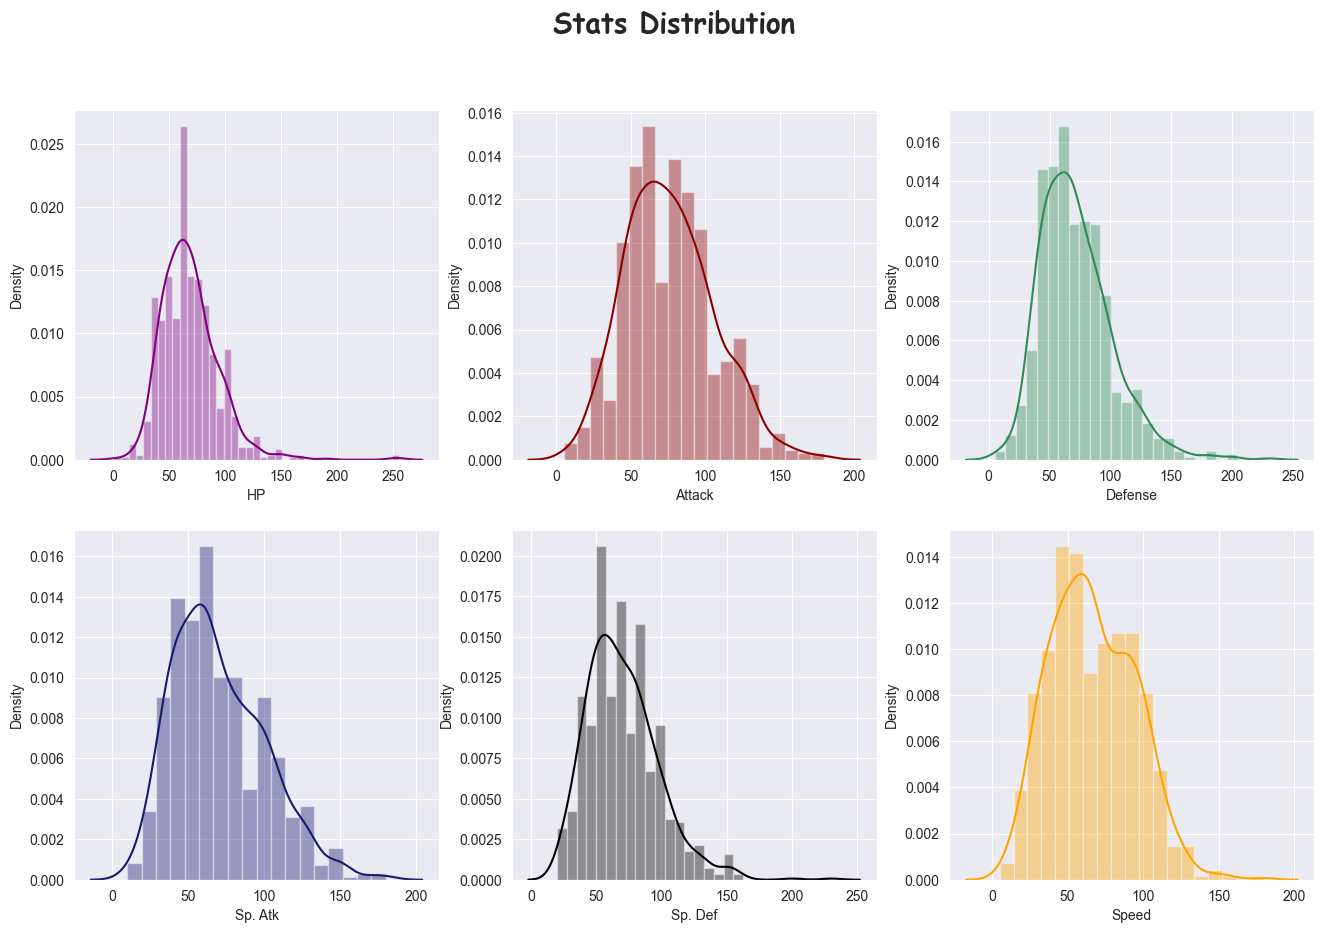

In [307]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Stats Distribution", fontweight='bold', fontfamily='Comic Sans MS', fontsize=20)

sns.distplot(a=df['HP'], kde=True, color='purple', ax=ax[0, 0])
sns.distplot(a=df['Attack'], kde=True, color='darkred', ax=ax[0, 1])
sns.distplot(a=df['Defense'], kde=True, color='seagreen', ax=ax[0, 2])
sns.distplot(a=df['Sp. Atk'], kde=True, color='midnightblue', ax=ax[1, 0])
sns.distplot(a=df['Sp. Def'], kde=True, color='black', ax=ax[1, 1])
sns.distplot(a=df['Speed'], kde=True, color='orange', ax=ax[1, 2])

fig.show()

In [328]:
# Due to the presence of multiple outliers, we are considering median (for it is positional avg) instead of mean.
print('Summary from the distribution plots: \n')

print(f"Hit Point: {df['HP'].median() :0.2f}")
print(f"Attack: {df['Attack'].median() :0.2f}")
print(f"Defense: {df['Defense'].median() : 0.2f}")
print(f"Special Attack: {df['Sp. Atk'].median() :0.2f}")
print(f"Special Defence: {df['Sp. Def'].median() :0.2f}")
print(f"Speed: {df['Speed'].median() :0.2f}")

Summary from the distribution plots: 

Hit Point: 65.00
Attack: 75.00
Defense:  68.00
Special Attack: 65.00
Special Defence: 65.00
Speed: 65.00
